# Problem and Data Understanding
Money Laundry menjadi salah satu tantangan serius yang dapat merugikan negara dan masyarakat. Proses ini melibatkan upaya untuk menyembunyikan sumber dana yang diperoleh secara ilegal, seperti melalui kegiatan korupsi, perdagangan narkoba, terorisme, dan lainnya. Pelaku Money Laundry menggunakan berbagai metode dalam melakukan transaksi keuangan baik melalui bank, perusahaan, ataupun individu guna mencampurkan dana hasil kegiatan ilegal dengan dana yang sah. Tujuan utama dari Money Laundry adalah untuk menghindari deteksi dan tindakan hukum.


Dalam upaya menangani permasalahan ini, pihak berwenang memerlukan alat bantu yang dapat mengidentifikasi transaksi keuangan yang mencurigakan. Salah satu solusi yang dapat digunakan adalah membangun algoritma machine learning yang optimal. Machine learning merupakan cabang ilmu komputer yang memungkinkan komputer untuk belajar dari pola sebuah data dan membuat prediksi atau keputusan. Dengan memanfaatkan machine learning, pihak berwenang dapat mengklasifikasikan transaksi keuangan menjadi dua kategori yaitu Money Laundry atau tidak.


Saya ditugaskan untuk mengembangkan algoritma machine learning yang dapat mengkategorikan transaksi keuangan menggunakan data sintetis yang disediakan oleh IBM. Data yang disediakan dalam lomba ini berisikan transaksi keuangan antara individu, perusahaan, dan bank. Data ini juga mencakup seluruh siklus Money Laundry yaitu penempatan, layering, dan integrasi. Setiap transaksi dalam data ini memiliki sejumlah Feature seperti timestamp, from bank, account, to bank, account, amount received, receiving currency, amount paid, payment currency, payment format, dan is laundering. Seluruh feature ini memberikan informasi tentang detail transaksi, seperti waktu transaksi, bank asal dan tujuan, akun asal dan tujuan, jumlah uang yang diterima dan dibayarkan, mata uang, format pembayaran, dan apakah transaksi tersebut termasuk Money Laundry atau tidak sebagai labelnya. Feature-feature tersebut dapat menunjukkan apakah suatu transaksi merupakan Money Laundry atau bukan.


saya berusaha untuk dapat menciptakan algoritma machine learning dengan kinerja tinggi dalam mengklasifikasikan transaksi keuangan. Performa algoritma akan dinilai menggunakan metrik seperti precision, accuracy, recall, dan F1 score. Accuracy adalah rasio transaksi yang diprediksi dengan benar terhadap seluruh transaksi. Precision adalah rasio transaksi yang benar-benar Money Laundry terhadap transaksi yang diprediksi sebagai Money Laundry. Recall adalah rasio transaksi yang benar-benar Money Laundry terhadap transaksi yang sebenarnya Money Laundry. F1 score adalah rata-rata dari precision dan recall yang biasa digunakan ketika precision dan recall sama-sama dibutuhkan.

## Import New Dataset
Langkah pertama dalam melakukan Machine Learning Modeling adalah peng-Importan dataset. Dalam Soal "Preliminary Round : Machine Learning Model", terdapat dua dataset yang wajib digunakan dalam membuat model yakni dataset “Hi-Large_Trans.csv” dan “Li-Large_Trans.csv”. Kedua dataset ini memiliki feature yang persis sama tetapi dengan data yang berbeda. 
Data yang teridentifikasi sebagai Money Laundry lebih banyak terdapat pada dataset Hi-Large_Trans.csv dibandingkan dataset Li-Large_Trans.csv. 


Terdapat sebuah anomali di kedua dataset yakni adanya imbalance pada label 'Is Laundering' dimana rasio antara value 1 (teridentifikasi money laundry) dan value 0 (tidak teridentifikasi money laundry) hanya 1 : 807 pada dataset 'Hi', dan 1 : 1750 pada dataset 'Li'.Imbalance atau ketidakseimbangan value pada label dapat berakibat buruk pada hasil model kita. Permasalahannya adalah ketika model belajar banyak pada data training yang tidak money laundry, sedangkan model sedikit belajar pada data training yang teridentifikasi sebagai money laundry. Ketika tahap testing model, data yang menjadi data test jauh lebih banyak yang tidak money laundry sehingga akurasi dari model kita menjadi tidak akurat.


Oleh karena itu untuk menghindari imbalance data, maka saya menggabungkan kedua dataset ('Hi', dan 'Li') menjadi dataset baru yang bernama 'df'. Akan tetapi karena Hi lebih banyak mengandung data yang teridentifikasi sebagai money laundry, maka saya hanya mempertahankan dataset Hi dengan tupple-tupple yang teridentifikasi sebagai money laundry saya ('Is Laundering' == 1). Jumlah tupple/row yang diambil dair masing-masing dataset pun bukan diambil secara sembarangan. Saya sudah melakukan uji coba berupa trial and error dengan menyesuaikan memory yang dapat ditampung oleh device saya maisng-masing. Setelah melakukan beberapa kali trial and error, saya sepakat untuk mengambil row dari dataset 'Hi' yang teridentifikasi sebagai money laundry saja dari 50.000.000 row keseluruhan, dan mengambil row random pada dataset 'Li' sebanyak 100.000 row.

In [1]:
import pandas as pd
import numpy as np

# Membaca dua dataset
df2 = pd.read_csv('C:/DSCO/HI-Large_Trans.csv', nrows=50000000)
df1 = pd.read_csv('C:/DSCO/LI-Large_Trans.csv', nrows=100000)

In [2]:
#df3 merupakan dataset yangs sama seperti df2 tetapi hanya berisi data yang 'Is Laundering' == 1 saja
df3 = df2[df2['Is Laundering'] == 1]

In [3]:
df3

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
27581,2022/08/01 00:19,70,100428660,8381,8035B3E00,27815.14,US Dollar,27815.14,US Dollar,Cheque,1
133037,2022/08/01 00:28,70,100428660,29630,814B11040,86532.59,US Dollar,86532.59,US Dollar,Cheque,1
141113,2022/08/01 00:06,215275,816439360,235985,816439870,4163.80,US Dollar,4163.80,US Dollar,ACH,1
154375,2022/08/01 00:05,70,100428660,220255,818305750,10111.03,US Dollar,10111.03,US Dollar,Cheque,1
161098,2022/08/01 00:16,70,100428660,1922,8192DF510,162.16,US Dollar,162.16,US Dollar,Cash,1
...,...,...,...,...,...,...,...,...,...,...,...
49995442,2022/08/27 07:19,70,1004289C0,182089,844A941C0,8830.49,Shekel,8830.49,Shekel,Cash,1
49995889,2022/08/27 07:18,70,1004289C0,1182567,849A81970,772.52,Shekel,772.52,Shekel,Cheque,1
49999427,2022/08/27 07:32,70,100428660,2102953,82621AFB0,206.57,US Dollar,206.57,US Dollar,Cheque,1
49999563,2022/08/27 07:42,14993,828972C00,194492,82897A990,16927.87,US Dollar,16927.87,US Dollar,Cheque,1


In [4]:
# saya membuat dataframe baru dengan nama 'df' untuk menggabungkan df1 dan df3 saja tanpa campuran dari df2
# df2 tidak terpakai karena sudah digantikan dengan isi dari df3

df = pd.concat([df1, df3], ignore_index=True)

NOTES : Untuk menghindari seluruh data dari df1 berada diatas, sedangkan seluruh data df3 berada di bawah, saya menggunakan function shuffle dari library sklearn.utils untuk mengacak row pada df sehingga baik data dari df1 ataupun data dari df3 bisa tercampur

In [5]:
# Import Function shuffle  
from sklearn.utils import shuffle
df = shuffle(df).reset_index(drop=True)

In [6]:
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/08/24 04:56,8882,837D8FBE0,117497,837DA1A20,4807.91,US Dollar,4807.91,US Dollar,ACH,1
1,2022/09/04 15:27,237777,81A98D970,252706,8136116E0,5302.32,US Dollar,5302.32,US Dollar,ACH,1
2,2022/08/01 00:23,15781,803655070,15781,803655070,12370.70,US Dollar,12370.70,US Dollar,Reinvestment,0
3,2022/08/04 00:32,1213,8001CAB70,2609,8001FA180,8691042.90,Euro,8691042.90,Euro,ACH,1
4,2022/09/10 16:41,29574,803FCDA70,211052,805824F50,16473.56,US Dollar,16473.56,US Dollar,ACH,1
...,...,...,...,...,...,...,...,...,...,...,...
157617,2022/08/01 00:28,2310,800331C20,222457,80BA6B880,10337.17,US Dollar,10337.17,US Dollar,Cheque,0
157618,2022/08/01 00:11,29496,80E709470,29496,80E709470,1625.07,US Dollar,1625.07,US Dollar,Reinvestment,0
157619,2022/09/11 11:36,15830,802623AB0,1538,80331D710,5878.85,Euro,5878.85,Euro,ACH,1
157620,2022/08/15 11:18,272896,81BBEA160,272142,81C393430,1321737.77,Ruble,1321737.77,Ruble,ACH,1


## Check Overview Data
Pada bagian Check Overview Data, saya ingin melihat kondisi data saya secara keseluruhan. Pada bagian ini lah saya dapat mengetahui dan mengenal dataset yang akan saya olah selanjutnya. Bagi saya, melakukan Checking secara kasar diawal pemrosesan data sangatlah penting. Salah satu tujuan utama saya mengenal dataset saya diawal adalah agar saya dapat mengetahui langkah apa yang harus saya lakukan selanjutnya.

In [7]:
# Check jumlah data yang teridentifikasi sebagai money laundry dan yang tidak.
# terlihat bahwa data sudah cukup seimbang

df['Is Laundering'].value_counts()

0    99997
1    57625
Name: Is Laundering, dtype: int64

In [8]:
#check dimensi data
df.shape

(157622, 11)

In [9]:
#check informasi masing-masing Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           157622 non-null  object 
 1   From Bank           157622 non-null  int64  
 2   Account             157622 non-null  object 
 3   To Bank             157622 non-null  int64  
 4   Account.1           157622 non-null  object 
 5   Amount Received     157622 non-null  float64
 6   Receiving Currency  157622 non-null  object 
 7   Amount Paid         157622 non-null  float64
 8   Payment Currency    157622 non-null  object 
 9   Payment Format      157622 non-null  object 
 10  Is Laundering       157622 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 13.2+ MB


In [10]:
#check variasi data dari tiap Feature
df.nunique()

Timestamp              38928
From Bank               9097
Account               109932
To Bank                 9829
Account.1             116236
Amount Received       123447
Receiving Currency        15
Amount Paid           123609
Payment Currency          15
Payment Format             7
Is Laundering              2
dtype: int64

## Check Missing Value
Langkah selanjutnya adalah pengecekan missing value dari masing-masing feature. saya cukup beruntung mendapat data yang tidak ada missing valuenya sama sekali sehingga dapat memudahkan dalam pemrosesan data. Jika dataset memiliki beberapa missing value pada suatu featurenya, maka saya harus meng-impute data yang tidak ada tersebut berdasarkan nilai statistik deskriptif datanya dengan aturan dasar :

*) Jika data numerik kontinu : menggunakan mean

*) Jika data numerik diskrit : menggunakan median/modus

*) Jika data kategorik : menggunakan modus


NOTES : aturan-aturan tersebut dapat disesuaikan dengan kondisi dataset (tidak pasti)

In [11]:
# Check Missing Value pada masing-masing feature
df.isna().sum() 

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

## Check Outliers
Outlier merupakan data yang menyimpang secara ekstrim (jauh) dari rata-rata sekumpulan data yang ada. Dalam praktik, biasanya data yang merupakan nilai outliers harus diperlakukan secara khusus. Umumnya ada 2 cara untuk memperlakukan Outliers seperti menghapusnya atau menggantinya dengan rata-rata/mean/modus dari sekumpulan data yang ada. Pertama, mari kita mencari data mana saja yang teridentifikasi sebagai outliers.

In [12]:
# melihat 5 tupple data paling atas dari dataframe 'df'
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/08/24 04:56,8882,837D8FBE0,117497,837DA1A20,4807.91,US Dollar,4807.91,US Dollar,ACH,1
1,2022/09/04 15:27,237777,81A98D970,252706,8136116E0,5302.32,US Dollar,5302.32,US Dollar,ACH,1
2,2022/08/01 00:23,15781,803655070,15781,803655070,12370.70,US Dollar,12370.70,US Dollar,Reinvestment,0
3,2022/08/04 00:32,1213,8001CAB70,2609,8001FA180,8691042.90,Euro,8691042.90,Euro,ACH,1
4,2022/09/10 16:41,29574,803FCDA70,211052,805824F50,16473.56,US Dollar,16473.56,US Dollar,ACH,1


In [13]:
# melihat dimensi dataframe
df.shape

(157622, 11)

Salah satu metode untuk melihat dan mengumpulkan data outliers adalah dengan mencari data yang lebih kecil dari mean - (3 * standar deviasi) nya ATAU lebih besar dari mean + (3 * standar deviasi) nya. Metode dibawah ini dapat mengidentifikasikan apakah satu transaksi memiliki nilai outliers pada kolom 'Amount Received'nya atau tidak.

In [14]:
#Identifikasi Value Outliers
mean = df['Amount Received'].mean()
std = df['Amount Received'].std()
Tmin = mean - (3 * std)
Tmax = mean + (3 * std)

# menampilkan value dari kolom 'Amount Received' yang kurang dari Tmin atau lebih besar dari Tmax
filtered_values = df[(df['Amount Received'] < Tmin) | (df['Amount Received'] > Tmax)]['Amount Received'].values
print(filtered_values)

[6.75961604e+11 6.87801589e+09 6.15553603e+10 2.19763435e+10
 1.46591751e+11 2.04314907e+10 2.25387209e+11 1.11268094e+10
 6.88899462e+09 1.72983587e+10 3.31445671e+10 8.44473454e+09
 6.64426497e+09 2.95988890e+10 1.64803850e+10 2.43018696e+11
 1.95491079e+10 7.69803230e+09 2.92897553e+11 5.07450890e+10
 7.18714109e+10 1.60987422e+10 1.42127118e+10 1.95446343e+10
 1.30051514e+11 8.41429155e+09 2.47117868e+10 9.74348109e+09
 1.79171777e+10 4.38234061e+10 7.93900458e+09 1.21622639e+11
 1.79229410e+10 1.49241228e+10 1.14681755e+11 7.05811815e+09
 7.17401506e+09 1.99225033e+10 1.08150963e+11 6.69439520e+10
 3.75100076e+10 7.30597029e+10 2.86331831e+10 2.00563118e+10
 1.38513550e+10]


In [15]:
# Melihat jumlah data yang teridentifikasi oleh filtered_values
jumlah_data_teridentifikasi = len(filtered_values)
print("Jumlah data yang teridentifikasi sebagai Outliers:", jumlah_data_teridentifikasi)

Jumlah data yang teridentifikasi sebagai Outliers: 45


Ketika kita sudah mengetahui data mana saja kah yang teridentifikasi outliers, langkah selanjutnya adalah menentukan perlakukan khusus pada outliers (dihiraukan/dihapus/dimanipulasi). saya sengaja untuk tidak langsung menghapus nilai-nilai outliers karena saya memiliki sebuah kecurigaan bahwa bisa saja pelaku money laundry menerima jumlah uang dari akun transaksi asal yang tidak biasa atau yang menyimpang ekstrim dari rata-rata kebanyakan orang.

Untuk menentukan tindakan apa yang masuk akal pada outliers dalam kasus money laundry ini, kita perlu melihat berapa banyak data outliers yang teridentifikasi money laundry dan berapa banyak yang tidak teridentifikasi sebagai money laundry.

In [16]:
# Menampilkan data yang sesuai dalam bentuk dataframe
outliers_dataframe = df[(df['Amount Received'] < Tmin) | (df['Amount Received'] > Tmax)]

# Menampilkan jumlah nilai unik dalam kolom 'Is Laundering' dari DataFrame outliers_dataframe
count_is_laundering = outliers_dataframe['Is Laundering'].value_counts()
print("Jumlah masing-masing nilai unik dalam kolom 'Is Laundering':\n", count_is_laundering)

Jumlah masing-masing nilai unik dalam kolom 'Is Laundering':
 1    45
Name: Is Laundering, dtype: int64


In [17]:
#visualisasi dataframe baru yang berisi data outliers saja
df[df['Amount Received'].isin(filtered_values)]

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
3171,2022/08/19 17:43,266946,81A2D04C0,266946,81A4AFE20,6.759616e+11,Ruble,6.759616e+11,Ruble,ACH,1
7034,2022/08/12 07:36,262657,81A536E10,282,81C394920,6.878016e+09,Ruble,6.878016e+09,Ruble,ACH,1
10932,2022/08/08 23:35,1140210,8363E1100,2148462,8363E8250,6.155536e+10,Mexican Peso,6.155536e+10,Mexican Peso,ACH,1
11321,2022/08/28 16:07,16098,810B51C30,39424,8129FA8A0,2.197634e+10,Yen,2.197634e+10,Yen,ACH,1
15402,2022/08/04 04:06,246487,8120F9710,234541,8120F9B20,1.465918e+11,Yuan,1.465918e+11,Yuan,ACH,1
16099,2022/08/27 05:53,4563,80320C490,18140,8140BC700,2.043149e+10,Yen,2.043149e+10,Yen,ACH,1
18370,2022/08/20 08:53,255595,827540950,54448,827540C90,2.253872e+11,Yen,2.253872e+11,Yen,Cheque,1
26280,2022/08/28 09:32,233615,814E59050,179275,81D6C6C40,1.112681e+10,Ruble,1.112681e+10,Ruble,ACH,1
34750,2022/08/21 18:08,40999,8101CDD20,140756,8110B4520,6.888995e+09,Yuan,6.888995e+09,Yuan,ACH,1
43383,2022/08/27 18:54,180965,820A0E4D0,35634,80F49B880,1.729836e+10,Yuan,1.729836e+10,Yuan,ACH,1


Setelah saya melakukan perhitungan, ternyata dari 45 Outliers terdapat 45 data yang teridentifikasi sebagai money laundry dilihat dari kolom 'Is Laundering' == 1. Hal ini berarti kecurigaan saya terbukti bahwa memang para pelaku money laundry menerima jumlah uang dari akun transaksi asal yang tidak biasa atau yang menyimpang ekstrim dari rata-rata kebanyakan orang.

Dengan demikian, langkah paling masuk akal untuk menindak 45 outliers ini adalah dengan membiarkannya ada di dataframe df. 

In [19]:
#Jika ingin menghilangkan outliers dari dataframe df dapat menjalankan kode dibawah :

#Remove Outliers From the dataframe
#df = df[~df['Amount Received'].isin(filtered_values)]
#df.shape

In [20]:
# Cek Informasi masing-masing feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           157622 non-null  object 
 1   From Bank           157622 non-null  int64  
 2   Account             157622 non-null  object 
 3   To Bank             157622 non-null  int64  
 4   Account.1           157622 non-null  object 
 5   Amount Received     157622 non-null  float64
 6   Receiving Currency  157622 non-null  object 
 7   Amount Paid         157622 non-null  float64
 8   Payment Currency    157622 non-null  object 
 9   Payment Format      157622 non-null  object 
 10  Is Laundering       157622 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 13.2+ MB


## Feature Selection and Manipulation
Seperti yang sudah kita ketahui bersama, bahwa Machine Learning hanya dapat mengolah data yang bertipe numerik. Maka dari itu penting bagi kita untuk bijak memilih Feature-feature yang ada. Ketika ada feature yang tidak dapat diolah maka kita dapat memanipulasinya untuk dapat menghasilkan value yang berarti.

Berdasarkan informasi data diatas, ada beberapa kolom yang tidak bertipe data numerik yakni :

*) Timestamp

*) Account

*) Account.1

*) Receiving Currency

*) Payment Currency

*) Payment Format

In [22]:
# check data atribute
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

saya memulai dengan memanipulasi kolom 'Timestamp'. kolom 'Timestamp' merupakan kolom bertipe object yang menyimpan data Tahun/Bulan/Hari/Jam/Menit dari suatu transaksi. saya melakukan manipulasi pada kolom 'Timestamp' dengan hanya mengambil jam dan menitnya saja sebagai kolom baru bernama 'Hour' dan 'Minutes' bertipe integer.


Hal ini saya lakukan bukan tanpa alasan, melainkan karena saya memiliki kecurigaan bahwa ada kemungkinan para pelaku money laundry melakukan transaksi money laundry pada jam-jam tertentu. Maka dari itu saya berusaha untuk memanipulasi kolom 'Timestamp' yang awalnya bertipe objek, saya convert menjadi tipe timedate.


Setelah sistem sudah mengenal kolom 'Timestamp' sebagai kolom yang bertipe timedate, saya membuat kolom baru ('Hour' dan 'Minutes') untuk menyimpan jam dan menit dari kolom 'Timestamp'. Dengan demikian kolom 'Timestamp' menjadi kolom yang tidak relevan lagi maka saya memutuskan untuk drop kolom 'Timestamp'.

In [23]:
# Konversi kolom Timestamp ke tipe data datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [24]:
# Mengakses atribut jam dan menit menggunakan 'dt'
df['Hour'] = df['Timestamp'].dt.hour
df['Minutes'] = df['Timestamp'].dt.minute

In [25]:
#check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Timestamp           157622 non-null  datetime64[ns]
 1   From Bank           157622 non-null  int64         
 2   Account             157622 non-null  object        
 3   To Bank             157622 non-null  int64         
 4   Account.1           157622 non-null  object        
 5   Amount Received     157622 non-null  float64       
 6   Receiving Currency  157622 non-null  object        
 7   Amount Paid         157622 non-null  float64       
 8   Payment Currency    157622 non-null  object        
 9   Payment Format      157622 non-null  object        
 10  Is Laundering       157622 non-null  int64         
 11  Hour                157622 non-null  int64         
 12  Minutes             157622 non-null  int64         
dtypes: datetime64[ns](1), float64

In [26]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour,Minutes
0,2022-08-24 04:56:00,8882,837D8FBE0,117497,837DA1A20,4807.91,US Dollar,4807.91,US Dollar,ACH,1,4,56
1,2022-09-04 15:27:00,237777,81A98D970,252706,8136116E0,5302.32,US Dollar,5302.32,US Dollar,ACH,1,15,27
2,2022-08-01 00:23:00,15781,803655070,15781,803655070,12370.70,US Dollar,12370.70,US Dollar,Reinvestment,0,0,23
3,2022-08-04 00:32:00,1213,8001CAB70,2609,8001FA180,8691042.90,Euro,8691042.90,Euro,ACH,1,0,32
4,2022-09-10 16:41:00,29574,803FCDA70,211052,805824F50,16473.56,US Dollar,16473.56,US Dollar,ACH,1,16,41


In [27]:
#Drop unrelatable columns
df = df.drop(columns=['Timestamp'])

Setelah memanupulasi kolom 'Timestamp', saya beralih ke feature selanjutnya yaitu 'Account' dan 'Account.1' dimana 'Account' merupakan Kode heksadesimal akun transaksi asal, dan 'Account.1' merupakan Kode heksadesimal akun transaksi tempat tujuan transaksi berakhir. Pada prosesnya, saya ingin mengetahui apakah ada pengaruh jika ada transaksi dari suatu rekening ke rekening yang sama terhadap identifikasi sebagai transaksi money laundry. 

Maka dari itu saya membuat kolom baru bernama 'Different Account' yang akan bernilai 0 jika transaksi dilakukan ke rekening yang sama dengan rekening pengirim, dan akan bernilai 1 jika transaksi dilakukan ke rekening yang berbeda dengan rekening pengirim. Setelah kolom 'Different Account' terbentuk, maka kolom 'Account' dan 'Account.1' tidak relevan lagi dan bisa di drop.

In [28]:
df['Different Account'] = np.where(df['Account'] == df['Account.1'], 0, 1)

In [29]:
df.tail()

,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour,Minutes,Different Account
157617,2310,800331C20,222457,80BA6B880,10337.17,US Dollar,10337.17,US Dollar,Cheque,0,0,28,1
157618,29496,80E709470,29496,80E709470,1625.07,US Dollar,1625.07,US Dollar,Reinvestment,0,0,11,0
157619,15830,802623AB0,1538,80331D710,5878.85,Euro,5878.85,Euro,ACH,1,11,36,1
157620,272896,81BBEA160,272142,81C393430,1321737.77,Ruble,1321737.77,Ruble,ACH,1,11,18,1
157621,15769,80439CAC0,15769,80439CAC0,6903.50,US Dollar,6903.50,US Dollar,Reinvestment,0,0,8,0


In [31]:
#melihat jumlah data untuk pada kolom different account
df['Different Account'].value_counts()

1    83658
0    73964
Name: Different Account, dtype: int64

In [32]:
count_1_0 = df[(df['Different Account'] == 1) & (df['Is Laundering'] == 0)]['Is Laundering'].count()
count_0_1 = df[(df['Different Account'] == 0) & (df['Is Laundering'] == 1)]['Is Laundering'].count()
count_1_1 = df[(df['Different Account'] == 1) & (df['Is Laundering'] == 1)]['Is Laundering'].count()
count_0_0 = df[(df['Different Account'] == 0) & (df['Is Laundering'] == 0)]['Is Laundering'].count()

# Menampilkan hasil
print("Jumlah (Different Account=1, Is Laundering=0):", count_1_0)
print("Jumlah (Different Account=0, Is Laundering=1):", count_0_1)
print("Jumlah (Different Account=1, Is Laundering=1):", count_1_1)
print("Jumlah (Different Account=0, Is Laundering=0):", count_0_0)


Jumlah (Different Account=1, Is Laundering=0): 26155
Jumlah (Different Account=0, Is Laundering=1): 122
Jumlah (Different Account=1, Is Laundering=1): 57503
Jumlah (Different Account=0, Is Laundering=0): 73842


In [33]:
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
conf_matrix = confusion_matrix(df['Is Laundering'], df['Different Account'])
conf_matrix

array([[73842, 26155],
       [  122, 57503]], dtype=int64)

Pada awalnya, saya berasumsi jika suatu transaksi terjadi dari suatu rekening ke rekening yang sama merupakan sebuah keanehan. Akan tetapi, setelah melakukan perhitungan ternyata pengaruh jika ada transaksi dari suatu rekening ke rekening yang sama terhadap identifikasi sebagai transaksi money laundry tidak cukup kuat. Hal ini didasari dari confusion matrix yang mengevaluasi pengaruh kolom 'Different Account' terhadap kolom 'Is Laundering' memiliki nilai yang cenderung rata. Adanya transaksi dari suatu rekening ke rekening yang sama DAN teridentifikasi sebagai money laundry hanya ada 122 data. Angka ini cenderung kecil jika dibandingkan dengan yang lainnya.

In [34]:
#Drop unrelatable columns
df = df.drop(columns=['Account','Account.1'])

In [35]:
df.head()

,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour,Minutes,Different Account
0,8882,117497,4807.91,US Dollar,4807.91,US Dollar,ACH,1,4,56,1
1,237777,252706,5302.32,US Dollar,5302.32,US Dollar,ACH,1,15,27,1
2,15781,15781,12370.70,US Dollar,12370.70,US Dollar,Reinvestment,0,0,23,0
3,1213,2609,8691042.90,Euro,8691042.90,Euro,ACH,1,0,32,1
4,29574,211052,16473.56,US Dollar,16473.56,US Dollar,ACH,1,16,41,1


In [36]:
# Lihat kembali informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   From Bank           157622 non-null  int64  
 1   To Bank             157622 non-null  int64  
 2   Amount Received     157622 non-null  float64
 3   Receiving Currency  157622 non-null  object 
 4   Amount Paid         157622 non-null  float64
 5   Payment Currency    157622 non-null  object 
 6   Payment Format      157622 non-null  object 
 7   Is Laundering       157622 non-null  int64  
 8   Hour                157622 non-null  int64  
 9   Minutes             157622 non-null  int64  
 10  Different Account   157622 non-null  int32  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 12.6+ MB


## Advanced Exploratory Data Analysis (Visualization Data)
Pada bagian ini, saya mengupayakan tindakan lanjutan dalam mengeksplor kembali data yang saya miliki. Hal ini bertujuan agar saya mengerti tindakan apa yang harus saya lakukan terhadap data yang ada guna membangun sebuah Model Machine Learning yang optimal.

In [37]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

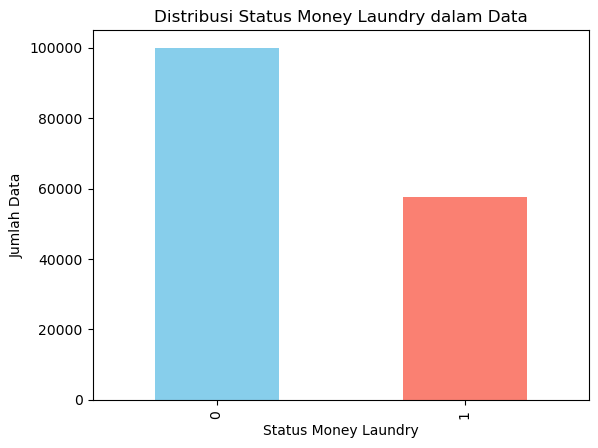

In [39]:
# Membuat barplot
df['Is Laundering'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Menambahkan label dan judul
plt.xlabel('Status Money Laundry')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Status Money Laundry dalam Data')

# Menampilkan barplot
plt.show()

Insight : Visualisasi diatas dapat memberikan gambaran terhadap perbandingan antara data yang teridentifikasi sebagai money laundry dan yang tidak teridentifikasi sebagai money laundry. Ternyata, dataframe df memiliki data yang tidak teridentifikasi sebagai money laundry lebih banyak dibandikan yang teridentifikasi money laundry. Tetapi perbedaannya tidak terlalu signifikan dimana masih dalam batas normal dengan ratio kurang lebih 2/3 : 1/3.

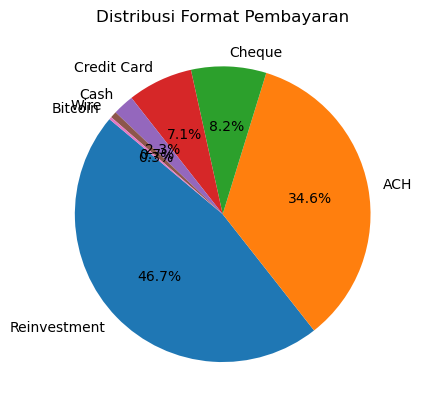

In [40]:
# Membuat pie chart dengan kolom 'Payment Format'
plt.pie(df['Payment Format'].value_counts(), labels=df['Payment Format'].value_counts().index, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Distribusi Format Pembayaran')

# Menampilkan pie chart
plt.show()

Insight : Dengan visualisasi dengan pie chart saya dapat melihat dengan jelas perbandingan proporsi data dalam bentuk persentase jumlah data berdasarkan format pembayaran yang ada. Dari visualisasi dengan pie chart, terlihat bahwa ada 2 format pembayaran yang paling sering digunakan untuk transaksi yakni adalah Reinvestment dengan proporsi 46.7% dan disusul oleh ACH dengan proporsi 34.6%.

Reinvestment merujuk pada tindakan menginvestasikan kembali dana yang telah diterima dari investasi sebelumnya. Ini dapat terjadi dalam berbagai konteks, seperti dividen yang diperoleh dari investasi saham yang kemudian diinvestasikan kembali untuk membeli lebih banyak saham.

ACH adalah sistem pembayaran elektronik yang digunakan untuk memproses transfer dana secara elektronik antara rekening bank di Amerika Serikat.

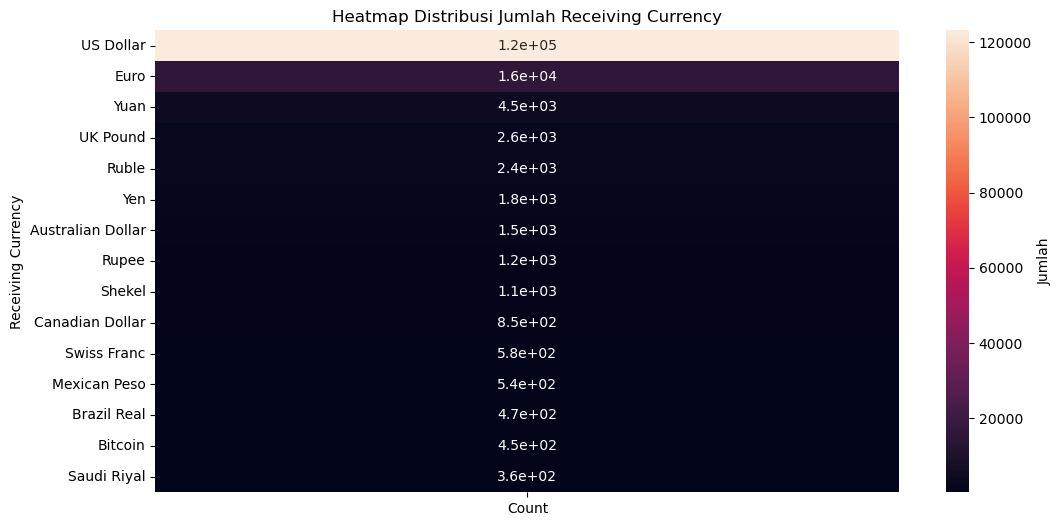

In [41]:
# Menghitung frekuensi setiap nilai dalam kolom 'Receiving Currency'
receiving_currency_counts = df['Receiving Currency'].value_counts().reset_index()
receiving_currency_counts.columns = ['Receiving Currency', 'Count']

# Membuat heatmap dengan data frekuensi
plt.figure(figsize=(12, 6))
sns.heatmap(receiving_currency_counts.set_index('Receiving Currency'), annot=True, cbar_kws={'label': 'Jumlah'})

# Menambahkan judul
plt.title('Heatmap Distribusi Jumlah Receiving Currency')

# Menampilkan heatmap
plt.show()

Insight : untuk memberikan variasi plotting dalam mengeksplor lebih jauh tentang dataset, saya juga menyajikan visualisasi dalam bentuk heatmap untuk melihat Receiving Currency yang digunakan terbanyak. Semakin terang warna heatmapnya, maka semakin banyak Receiving Currency tersebut digunakam. Dalam kasus ini Receiving Currency terbanyak dipegang oleh US Dollar.

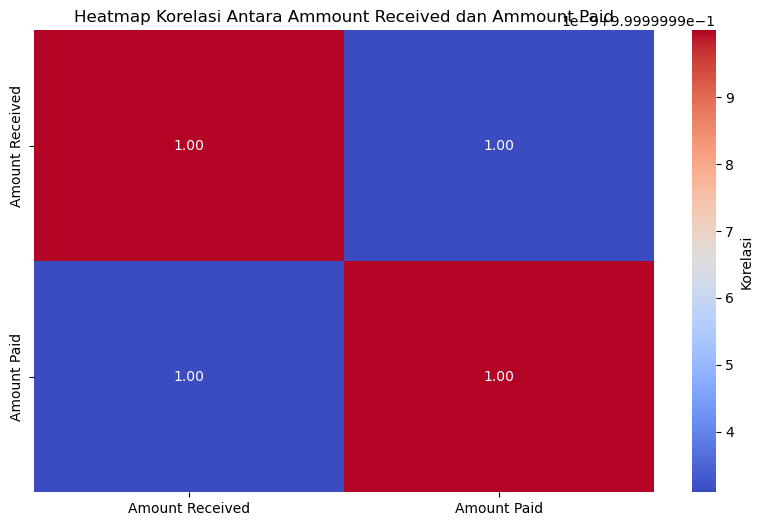

In [42]:
# Memilih kolom-kolom numerik untuk heatmap korelasi
numeric_columns = df[['Amount Received', 'Amount Paid']]

# Membuat heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Korelasi'})

# Menambahkan judul
plt.title('Heatmap Korelasi Antara Ammount Received dan Ammount Paid')

# Menampilkan heatmap
plt.show()

Insight : Dari Visualisasi diatas saya kembali menggunakan heatmap tetapi dengan penyajian yang berbeda. Heatmap diatas bukan untuk menunjukan distribusi atau penyebaran data seperti pada plot sebelumnya, tetapi untuk menunjukan korelasi antar atribut. Dalam visualisasi diatas, terlihat bahwa kolom 'Ammount Received' dan 'Ammount Paid' memiliki korelasi yang sempurna karena bernilai 1. Hal ini berarti ada hubungan yang kuat antara Jumlah uang yang diterima di akun transaksi asal dengan Jumlah uang yang dibayarkan.

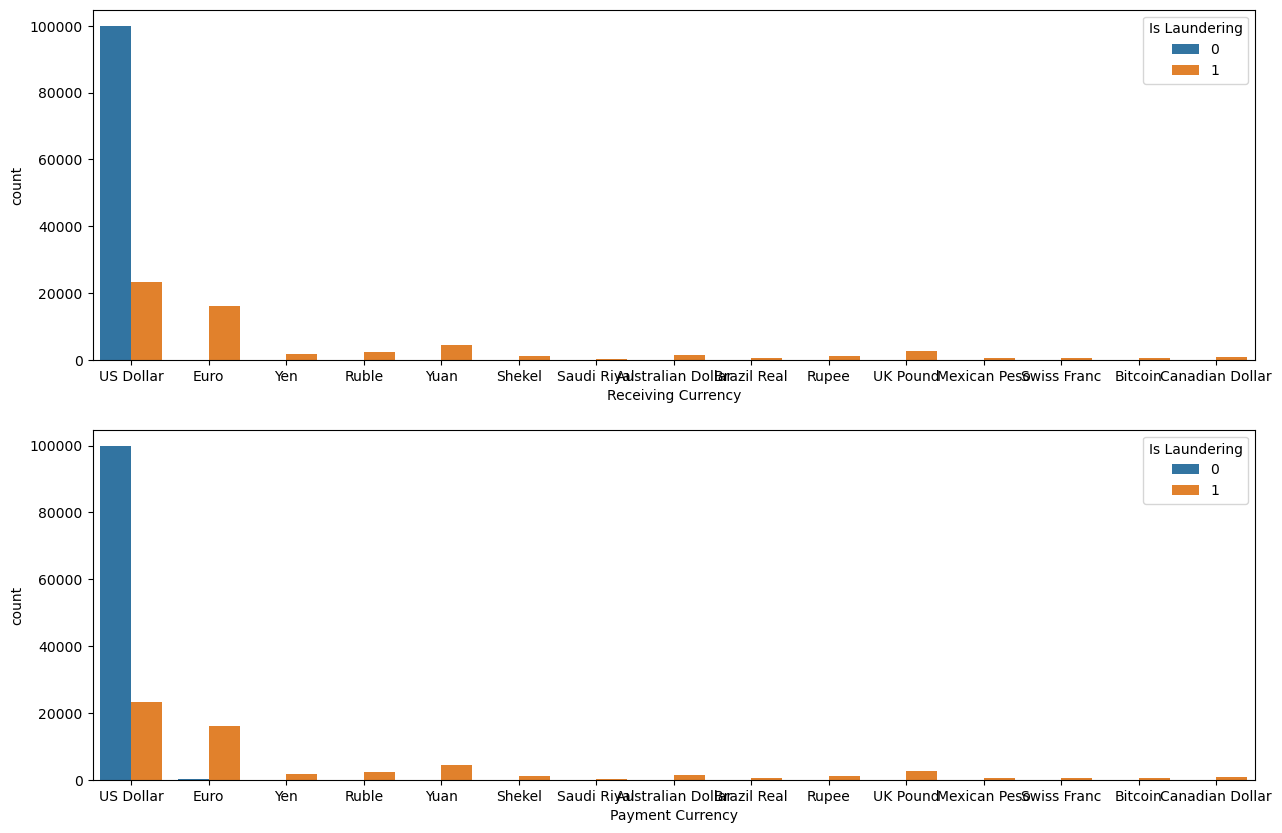

In [43]:
#Plot Categorical VS Target
cate = ["Receiving Currency","Payment Currency"]

fig, axes = plt.subplots(2,1,figsize=(15,10))
for cat, ax in zip(cate, axes.flatten()) :
  sns.countplot(x=cat,data=df,hue="Is Laundering",ax=ax)

Insight : Visualisasi diatas merupakan salah satu visualisasi terpenting ketika saya mengeksplore data yang ada lebih lanjut. Dari visualisasi diatas saya dapat membandingkan jumlah transaksi money laundry dan yang bukan money laundry terhadap payment currency yang mereka gunakan. Terlihat jelas bahwa hampir semua transaksi yang BUKAN MONEY LAUNDRY (bar berwarna biru) menggunakan US DOllar sebagai payment currency mereka. Hanya ada sangat sedikit transaksi yang bukan money laundry yang tidak menggunakan US Dollar sebagai payment currencynya.

Tetapi, perlu dicermati juga payment currency yang digunakan oleh para PELAKU MONEY LAUNDRY (bar berwarna orange). Kebanyakan dari mereka menggunakan payment currency yang tersebar di beberapa currency tidak hanya US Dollar, tetapi juga di Euro, Yuan, UK Pound, dan currency lainnya jauh melebihi yang bukan money laundry. Hal ini berarti satu hal yakni : para pelaku money laundry melakukan transasinya dengan menggunakan currency yang tidak hanya US Dollar seperti orang pada umumnya, tetapi banyak di currency lain yang jarang dipakai oleh orang normal.

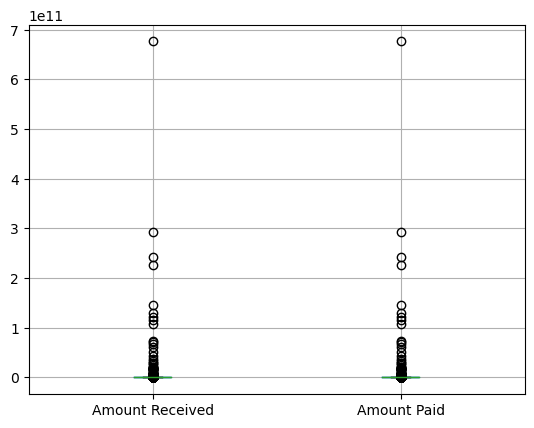

In [44]:
boxplot = df.boxplot(['Amount Received','Amount Paid'])

Insight : Visualisasi bocplot diatas merupakan boxplot untuk melihat outliers yang sudah kita ketahui sebelumnya, lingkaran dengan border hitam menunjukan nilai nilai outliers yang berada diluar boxplot. Artinya ada 45 lingkaran border hitam (outliers) yang Ammount Reveived dan Ammont Paidnya jauh lebih banyak dari kebanyakan transaksi orang normal.

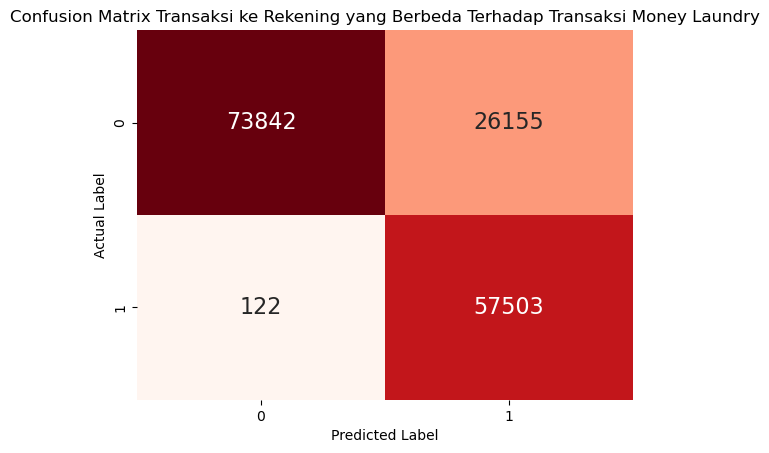

In [45]:
# Menghitung frekuensi kemunculan kombinasi kategori
cross_tab = pd.crosstab(df['Is Laundering'], df['Different Account'])

# Membuat heatmap dengan label
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 16}, cbar=False)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Transaksi ke Rekening yang Berbeda Terhadap Transaksi Money Laundry')

# Menampilkan plot
plt.show()

Insight : Visualisasi diatas adalah Confusion Matrix yang menunjukan jumlah True Positive, True Negative, False Positive, False Negative yang ada pada kolom 'Different Account' antara actual dan predicted valuenya. 

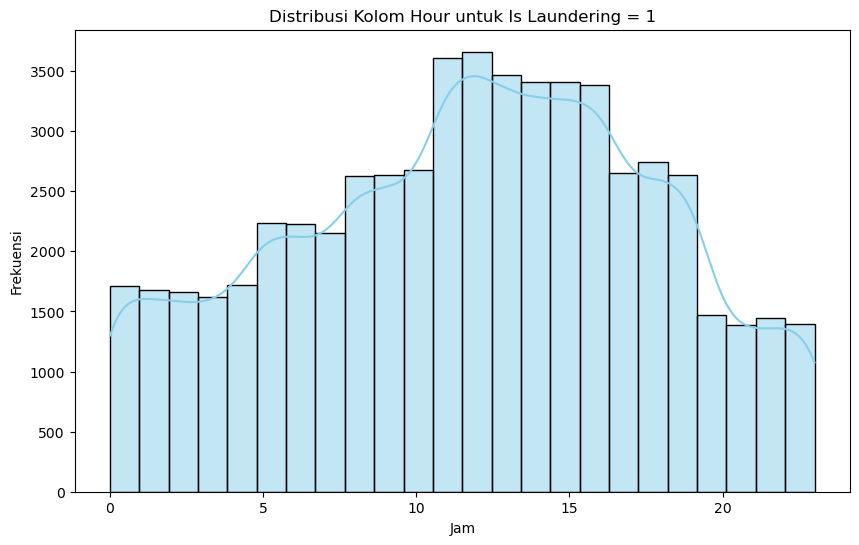

In [64]:
# Filter DataFrame hanya untuk 'Is Laundering' yang memiliki nilai 1
df_is_laundering_1 = df[df['Is Laundering'] == 1]

# Pembuatan Histogra,
plt.figure(figsize=(10, 6))
sns.histplot(data=df_is_laundering_1, x='Hour', bins=24, kde=True, color='skyblue')
plt.title('Distribusi Kolom Hour untuk Is Laundering = 1')
plt.xlabel('Jam')
plt.ylabel('Frekuensi')
plt.show()

Insight : Para pelaku money laundry kebanyakan melakukan transaksinya di siang hari sekitar jam 11.00 - 15.00

## Check Data Variation
tahapan selanjut adalah saya melihat variasi data dari masing masing kolom yang bertipe kategorik

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   From Bank           157622 non-null  int64  
 1   To Bank             157622 non-null  int64  
 2   Amount Received     157622 non-null  float64
 3   Receiving Currency  157622 non-null  object 
 4   Amount Paid         157622 non-null  float64
 5   Payment Currency    157622 non-null  object 
 6   Payment Format      157622 non-null  object 
 7   Is Laundering       157622 non-null  int64  
 8   Hour                157622 non-null  int64  
 9   Minutes             157622 non-null  int64  
 10  Different Account   157622 non-null  int32  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 12.6+ MB


In [57]:
#check data variation
df.nunique()

From Bank               9097
To Bank                 9829
Amount Received       123447
Receiving Currency        15
Amount Paid           123609
Payment Currency          15
Payment Format             7
Is Laundering              2
Hour                      24
Minutes                   60
Different Account          2
dtype: int64

*) Payment Currency dan Receiving Currency masing-masing memiliki 15 unique value


*) Payment Format memiliki 7 unique value

In [58]:
# melihat variasi kolom Payment Currency
df['Payment Currency'].unique()

array(['US Dollar', 'Euro', 'Yen', 'Ruble', 'Yuan', 'Shekel',
       'Saudi Riyal', 'Australian Dollar', 'Brazil Real', 'Rupee',
       'UK Pound', 'Mexican Peso', 'Swiss Franc', 'Bitcoin',
       'Canadian Dollar'], dtype=object)

In [59]:
# melihat variasi kolom Receiving Currency
df['Receiving Currency'].unique()

array(['US Dollar', 'Euro', 'Yen', 'Ruble', 'Yuan', 'Shekel',
       'Saudi Riyal', 'Australian Dollar', 'Brazil Real', 'Rupee',
       'UK Pound', 'Mexican Peso', 'Swiss Franc', 'Bitcoin',
       'Canadian Dollar'], dtype=object)

In [60]:
# melihat variasi kolom Payment Format
df['Payment Format'].unique()

array(['ACH', 'Reinvestment', 'Cash', 'Credit Card', 'Cheque', 'Wire',
       'Bitcoin'], dtype=object)

## Feature Engineering
Tujuan saya melihat variasi data kategorik diatas adalah untuk menentukan feature Engineering yang tepat untuk masing-masing kolom kategorik. Seperti yang sudah diketahui bersama, Machine Learning hanya dapat mengolah data numerik, maka data kategorik harus diubah ke data numerik dengan Feature Engineering. Feature Engineering memiliki beberapa metode seperti :

*) Binary Encoding (untuk mengubah data kategorik yang hanya memiliki 2 unique value)

*) One Hot Encoding (untuk mengubah data kategorik yang memiliki lebih dari 2 unique value)

*) Label Encoding (untuk mengubah data kategorik menjadi label yang kita tentukan sendiri)

*) Frequency Encoding (untuk mengubah data kategorik menjadi numerik berdasarkan frekuensi munculnya masing-masing value)

*) mean Encoding (untuk mengubah data kategorik menjadi numerik berdasarkan mean)

NOTES : Sangat penting untuk saya dapat memilih dengan bijak metode mana yang paling sesuai untuk suatu kolom kategorik

In [65]:
#Before Feature Engineering
df.head()

,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour,Minutes,Different Account
0,8882,117497,4807.91,US Dollar,4807.91,US Dollar,ACH,1,4,56,1
1,237777,252706,5302.32,US Dollar,5302.32,US Dollar,ACH,1,15,27,1
2,15781,15781,12370.70,US Dollar,12370.70,US Dollar,Reinvestment,0,0,23,0
3,1213,2609,8691042.90,Euro,8691042.90,Euro,ACH,1,0,32,1
4,29574,211052,16473.56,US Dollar,16473.56,US Dollar,ACH,1,16,41,1


Untuk kolom 'Payment Currency' dan 'Receiving Currency' saya sepakat untuk menggunakan frekuensi encoding. Alasannya karena variasi data nya cukup banyak (terdapat 15 unique value) sehingga tidak bisa menggunakan binary encoding dan juga akan sangat memberatkan jika menggunakan one hot ecoding. Selain itu alasan saya memilih frequency encoding adalah karena saya ingin mengganti suatu value dengan seberapa sering value tersebut muncul jika dibandingkan dengan value unik yang lainnya.

In [66]:
#Create a Frequency Encoding Function
def frequency_encoding(data,features) :
    freq_encoding=data.groupby(features).size()/len(data)
    return freq_encoding

In [67]:
df['Payment Currency'] = df['Payment Currency'].map(frequency_encoding(df,df['Payment Currency']))

In [68]:
df['Receiving Currency'] = df['Receiving Currency'].map(frequency_encoding(df,df['Receiving Currency']))

Pada kolom 'Payment Format' saya sepakat untuk menggunakan one hot encoding sebagai feature engineering karena jumlah unique value dari kolom 'Payment Format' hanya ada 7 sehingga tidak terlalu memberatkan saat pembangunan model Machine Learning.

In [69]:
#One hot encoding For Payment Format
df = pd.get_dummies(df,columns=['Payment Format'])

In [70]:
df.head()

,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Is Laundering,Hour,Minutes,Different Account,Payment Format_ACH,Payment Format_Bitcoin,Payment Format_Cash,Payment Format_Cheque,Payment Format_Credit Card,Payment Format_Reinvestment,Payment Format_Wire
0,8882,117497,4807.91,0.781078,4807.91,0.780342,1,4,56,1,1,0,0,0,0,0,0
1,237777,252706,5302.32,0.781078,5302.32,0.780342,1,15,27,1,1,0,0,0,0,0,0
2,15781,15781,12370.70,0.781078,12370.70,0.780342,0,0,23,0,0,0,0,0,0,1,0
3,1213,2609,8691042.90,0.102200,8691042.90,0.102904,1,0,32,1,1,0,0,0,0,0,0
4,29574,211052,16473.56,0.781078,16473.56,0.780342,1,16,41,1,1,0,0,0,0,0,0


In [71]:
df.shape

(157622, 17)

In [73]:
# terlihat bahwa semua data type sudah dalam bentuk numerik
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157622 entries, 0 to 157621
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   From Bank                    157622 non-null  int64  
 1   To Bank                      157622 non-null  int64  
 2   Amount Received              157622 non-null  float64
 3   Receiving Currency           157622 non-null  float64
 4   Amount Paid                  157622 non-null  float64
 5   Payment Currency             157622 non-null  float64
 6   Is Laundering                157622 non-null  int64  
 7   Hour                         157622 non-null  int64  
 8   Minutes                      157622 non-null  int64  
 9   Different Account            157622 non-null  int32  
 10  Payment Format_ACH           157622 non-null  uint8  
 11  Payment Format_Bitcoin       157622 non-null  uint8  
 12  Payment Format_Cash          157622 non-null  uint8  
 13 

## Splitting Dataset
Selanjutnya saya memulai pembangunan model machine learning ini dengan melakukan splitting dataset. Splitting ini bertujuan agar ada sebagian data yang menjadi bahan untuk pelatihan model Machine Learning saya (training model), dan sebagian lagi untuk mengetes model saya untuk melihat ke-akuratan model yang dibangun (testing model). Pada kasus ini, saya membagi data menjadi 80% untuk training dan 20% untuk testing.

In [74]:
from sklearn.model_selection import train_test_split

#spliting dataset
X = df.drop(columns="Is Laundering")
y = df['Is Laundering']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((126097, 16), (31525, 16), (126097,), (31525,))

# Logistic Regression Model : Default
Karena dalam kasus money laundry ini saya akan memprediksi apakah suatu transaksi masuk ke kategori money laundry atau tidak, maka model yang saya bangun adalah model untuk classification. Tujuannya agar model mampu mengklasifikasikan apakah suatu transaksi masuk ke kategori money laundry atau bukan. Model pertama yang kakmi bangun adalah model Logistic Regression.

In [75]:
# Import library
from sklearn.linear_model import LogisticRegression

# Train data dengan data training
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [76]:
# melihat keakuratan model
model_log.score(X_test,y_test)

0.36678826328310865

In [77]:
y_predict_log=model_log.predict(X_test)

In [78]:
# Menampilkan report untuk melihat performa model

from sklearn.metrics import classification_report
print('\nLogistic Regression Classification Report (Default)\n')
print(classification_report(y_test, y_predict_log))


Logistic Regression Classification Report (Default)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     20000
           1       0.37      1.00      0.54     11525

    accuracy                           0.37     31525
   macro avg       0.68      0.50      0.27     31525
weighted avg       0.77      0.37      0.20     31525



# LR Model Improvement : Parameter Tuning
Model Logistic Regression diatas sangat jauh dari optimal karena hanya memiliki akurasi 37%. Maka dari itu saya mencoba untuk melakukan parameter tuning dengan GridsearchCV guna mencari parameter mana yang paling baik digunakan untuk mendapatkan akurasi paling maksimal. parameternya yakni penalty dan C.

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Tentukan parameter apa saja yang akan dituning
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Inisialisasi model Logistic Regression
modelLogReg = LogisticRegression()

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search_logreg = GridSearchCV(modelLogReg, param_grid=parameters, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [81]:
# Menampilkan parameter terbaik yang dapat menghasilkan akurasi maksimal yang dapat dibuat oleh Model Logistic Regression
print("Tuned Hyperparameters :", grid_search_logreg.best_params_)
print("Accuracy :",grid_search_logreg.best_score_)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Accuracy : 0.3661942751834925


In [82]:
#Train data dengan parameter terbaik
modellog_best = LogisticRegression(C = 0.001, penalty = 'l2')
modellog_best.fit(X_train,y_train)

LogisticRegression(C=0.001)

# Logistic Regression Evaluation Matrix (Best)

In [83]:
#testing
y_predict_bestlog = modellog_best.predict(X_test)

In [84]:
print('\nLogistic Regression Classification Report (Tuned)\n')
print(classification_report(y_test, y_predict_bestlog))


Logistic Regression Classification Report (Tuned)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     20000
           1       0.37      1.00      0.54     11525

    accuracy                           0.37     31525
   macro avg       0.68      0.50      0.27     31525
weighted avg       0.77      0.37      0.20     31525



# Naive Bayes Model : Default
Meskipun model Logistic Regression diatas sudah dimaksimalkan dengan parameter tuning, akurasinya masih jauh dibawah (37%). Maka saya menyimpulkan bahwa dalam kasus ini saya tidak bisa menggunakan model Logistic Regression. saya melanjutkan pencarian model terbaik dengan model Naive Bayes.

In [85]:
# Import library
from sklearn.naive_bayes import MultinomialNB

# Training Model
model_nb =MultinomialNB()
model_nb.fit(X_train, y_train)

MultinomialNB()

In [87]:
# Melihat akurasi model
model_nb.score(X_test,y_test)

0.5968279143536875

In [88]:
# Testing
y_predict_nb=model_nb.predict(X_test)

In [89]:
from sklearn.metrics import classification_report
print('\nNaive Bayes Classification Report (Default)\n')
print(classification_report(y_test, y_predict_nb))


Naive Bayes Classification Report (Default)

              precision    recall  f1-score   support

           0       0.62      0.91      0.74     20000
           1       0.24      0.05      0.08     11525

    accuracy                           0.60     31525
   macro avg       0.43      0.48      0.41     31525
weighted avg       0.48      0.60      0.50     31525



# NB Model Improvement : Parameter Tuning
model tersebut hanya memberikan akurasi sebesar 60% dalam memprediksi apakah sebuah transaksi masuk ke kategori money laundry atau tidak. saya masih ingin mencoba memaksimalkan model naive bayes saya dengan parameter tuning menggunakan gridSearchCV. saya melakukan tuning dengan parameter alpha pada model Naive Bayes.

In [90]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Tentukan parameter grid untuk Multinomial Naive Bayes
parameters = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Inisialisasi model Multinomial Naive Bayes
modelNB = MultinomialNB()

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search_nb = GridSearchCV(modelNB, param_grid=parameters, scoring='accuracy', cv=5)
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [91]:
# Menampilkan parameter terbaik dan akurasi maksimalnya

print("Tuned Hyperparameters :", grid_search_nb.best_params_)
print("Accuracy :",grid_search_nb.best_score_)

Tuned Hyperparameters : {'alpha': 0.001}
Accuracy : 0.5981189091252932


In [92]:
#Train data dengan parameter terbaik
modelnb_best = MultinomialNB(alpha = 0.001)
modelnb_best.fit(X_train,y_train)

MultinomialNB(alpha=0.001)

# Naive Bayes Evaluation Matrix (Best)

In [115]:
y_predict_bestnb = modelnb_best.predict(X_test)

In [116]:
print('\nNaive Bayes Classification Report (Tuned)\n')
print(classification_report(y_test, y_predict_bestnb))


Naive Bayes Classification Report (Tuned)

              precision    recall  f1-score   support

           0       0.62      0.91      0.74     20000
           1       0.23      0.05      0.08     11525

    accuracy                           0.60     31525
   macro avg       0.43      0.48      0.41     31525
weighted avg       0.48      0.60      0.50     31525



## K-Nearest Neighbor Model : Default
Setelah mengoptimalkan model Naive Bayes saya masih belum menemukan model yang terbaik dengan akurasi yang cukup tinggi untuk memprediksi label 'Is Laundering'. Maka dari itu, saya mencoba menggunakan model KNN.

In [93]:
# Import library
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

#train data dengan training data
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [94]:
# melihat akurasi KNN dengan data testing
print('KNN Default Accuracy :')
knn.score(X_test,y_test)

KNN Default Accuracy :


0.8808247422680412

In [95]:
# testing
y_predict_knndefault=knn.predict(X_test)

In [96]:
# menampilkan report klasifikasi untuk knn
from sklearn.metrics import classification_report
print('\nK-Nearest neighbor Classification Report (Default)\n')
print(classification_report(y_test, y_predict_knndefault))


K-Nearest neighbor Classification Report (Default)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     20000
           1       0.84      0.83      0.84     11525

    accuracy                           0.88     31525
   macro avg       0.87      0.87      0.87     31525
weighted avg       0.88      0.88      0.88     31525



# K-Nearest Neighbor : K-Fold 
model knn default sudah tergolong cukup baik karena mendapat akurasi 88%. Ini merupakan akurasi yang jauh lebih tinggi dari model Logistic Regression dan juga model Naive Bayes. Akan tetapi saya memiliki kecurigaan bahwa bisa saja hal ini merupakan sebuah kebetulan karena model di test dengan menggunakan data yang mudah ditebak kelasnya. Untuk mengatasi kecurigaan saya, saya mencoba menggunakan K-Fold untuk melihat 5 skenario akurasi model jika menggunakan 5 data test yang berbeda secara bergantian.

In [64]:
#import libraries
from sklearn.model_selection import cross_val_score

In [60]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_knn = cross_val_score(knn,X,y,cv=5)

In [61]:
print('KNN K Fold Accuracy :')
cross_knn.mean()

KNN K Fold Accuracy :


0.8776820663354712

# KNN Model Improvement : Parameter Tuning
Setelah melakukan K-Fold, saya cukup lega karena rata-rata akurasi model dari 5 skenario yang dibuat berdasarkan 5 data test yang berbeda menghasilkan akurasi 87.7% dan akurasi hanya berkurang sedikit saja dari yang default. Hal ini berarti bahwa akurasi 87-88% ini sudah cukup akurat dan bukan hanya sebuah keberntungan mendapat angka demikian. Langkah selanjutnya adalah memaksimalkan akurasi model dengan parameter tuning menggunakan gridSearchCV. saya melakukan tuning parameter n_neighbour dan weightsnya dan mencari parameter apa yang terbaik. n_neighbor berarti berapa jumlah tetangga terdekat yang akan dilihat, dan weights berarti apa ukuran yang dipakai (jumlah n terdekat/jarak terdekat).

In [97]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [98]:
# Tentukan parameter untuk KNN
parameters = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

# Inisialisasi model KNN
knn_tuned = KNeighborsClassifier()

# Pencarian parameter terbaik
knn_tuned = GridSearchCV(knn_tuned, param_grid=parameters, scoring='accuracy', cv=5)
knn_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [99]:
# menampilkan parameter terbaik dan akurasinya
print("Tuned Hyperparameters :", knn_tuned.best_params_)
print("Accuracy :",knn_tuned.best_score_)

Tuned Hyperparameters : {'n_neighbors': 7, 'weights': 'distance'}
Accuracy : 0.8846998664419747


In [100]:
# Train data dengan menggunakan parameter terbaik
modelknn_best = KNeighborsClassifier(n_neighbors = 7, weights= 'distance')
modelknn_best.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [101]:
# akurasi dengan parameter terbaik
modelknn_best.score(X_test,y_test)

0.889452815226011

# K-Nearest Neighbor Evaluation Matrix (Best)
Setelah di tuning dengan n_neighbors = 7, weights= 'distance', saya mendapatkan model yang akurasinya lebih baik yakni mencapai 88.94%.

In [102]:
#testing
y_predict_knntuned=modelknn_best.predict(X_test)

In [103]:
# Menampilkan report klasidifikasi untuk knn setelah dituning
from sklearn.metrics import classification_report
print('\nK-Nearest neighbor Classification Report (Tuned)\n')
print(classification_report(y_test, y_predict_knntuned))


K-Nearest neighbor Classification Report (Tuned)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     20000
           1       0.86      0.84      0.85     11525

    accuracy                           0.89     31525
   macro avg       0.88      0.88      0.88     31525
weighted avg       0.89      0.89      0.89     31525



# Decision Tree Model : Default
Model KNN diatas sudah memiliki akurasi yang cukup tinggi yakni 89%. akan tetapi saya ingin mencari tahu apakah ada model yang lebih baik daripada model KNN diatas dalam kasus ini. Maka dari itu saya mencoba membangun model terakhir dengan menggunakan Decision Tree.

In [104]:
# Import Library
from sklearn.tree import DecisionTreeClassifier

# Melakukan train dengan training data
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)

DecisionTreeClassifier()

In [105]:
# Menampilkan akurasi model Decision Tree
modelDT.score(X_test,y_test)

0.9976526566217288

In [106]:
# testing
y_predict_dtdefault=modelDT.predict(X_test)

In [107]:
# Menampilkan Classification Report untuk Decision Tree Default
from sklearn.metrics import classification_report
print('\nDecision Tree Classification Report (Default)\n')
print(classification_report(y_test, y_predict_dtdefault))


Decision Tree Classification Report (Default)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       1.00      1.00      1.00     11525

    accuracy                           1.00     31525
   macro avg       1.00      1.00      1.00     31525
weighted avg       1.00      1.00      1.00     31525



# DT Model Improvement : Parameter Tuning
Ternyata saya menemukan bahwa Model dengan Decision Tree menghasilkan akurasi yang sangat baik dan mencapai 99.76%. Padahal model ini masih belum saya maksimalkan dengan parameter tuning. Maka sekarang saya akan melakukan parameter Tuning dengan GridSearchCV dengan mencari parameter criterion dan max_depth yang menghasilkan akurasi maksimal.

In [108]:
# Import Library
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

modelDT = DecisionTreeClassifier()
modelDT = GridSearchCV(modelDT, param_grid = parameters, scoring='accuracy', cv=5)
modelDT.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8]},
             scoring='accuracy')

In [109]:
# Menampilkan parameter terbaik dan akurasinya
print("Tuned Hyperparameters :", modelDT.best_params_)
print("Accuracy :",modelDT.best_score_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 8}
Accuracy : 0.9980253332905257


In [110]:
#Train data dengan data training
modeldt_best = DecisionTreeClassifier(criterion= 'gini',max_depth=8)
modeldt_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [111]:
modeldt_best.score(X_test,y_test)

0.9984139571768438

# Decision Tree Evaluation Matrix (Best)
Setelah di testing, model maksimal yang dapat dibuat oleh Decision Tree adalah 99.84% (sedikit lebih baik daripada sebelum di tuning).

In [112]:
# testing
y_predict_bestdt = modeldt_best.predict(X_test)

In [113]:
# menampilkan clasification report
print('\nDecision Tree Classification Report (Tuned)\n')
print(classification_report(y_test, y_predict_bestdt))


Decision Tree Classification Report (Tuned)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       1.00      1.00      1.00     11525

    accuracy                           1.00     31525
   macro avg       1.00      1.00      1.00     31525
weighted avg       1.00      1.00      1.00     31525



In [115]:
# Confusion Matrix Untuk Matrix Evaluation Lanjutan

# Import Library
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
conf_matrix_bestdt = confusion_matrix(y_test, y_predict_bestdt)
conf_matrix_bestdt

array([[19998,     2],
       [   48, 11477]], dtype=int64)

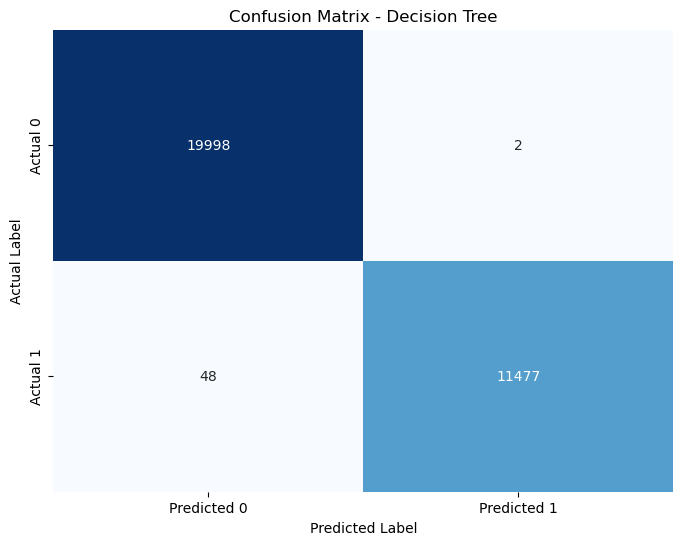

In [117]:
# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bestdt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Kesimpulan :


Model Machine Learning yang paling optimal dalam "Preliminary Round : Machine Learning Model" dengan kasus Identified Money Laundry Transaction adalah menggunakan model Decision Tree dengan Hyperparameters : {'criterion': 'entropy', 'max_depth': 8}. saya berhasil mencapai akurasi 99.8%. Dan berikut adalah hasil evaluasi model Decision Tree saya :

Dari confusion matrix diatas hanya ada 48 transaksi yang sebenarnya money laundry, tetapi diprediksi bukan money laundry (FALSE Negative), dan hanya ada 2 transaksi yang sebenarnya bukan money laundry, tetapi diprediksi money laundry (FALSE POSITIVE).

Dari insight tersebut kita dapat mengetahui nilai-nilai evaluasi lain yang sebenarnya ada juga di clasification report diatas yakni precision, recall, dan f1 score yang hampir 100% (tetapi pada clasification report dibulatkan menjadi 100%). 